In [1]:
#Load packages
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import *

from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler  



## This function will plot the true vs. predicted with various line fits
def plotSummary(true, predicted, name):
    #from pylab import *
    #import numpy as np
    #import matplotlib.pyplot as plt
    
    figure()
    plt.scatter(true,predicted, alpha = 0.2)
    
    plt.title(name)
    plt.xlabel('True')
    plt.ylabel('Predicted')

    xmin, xmax = plt.xlim()
    plt.plot([xmin,xmax], [xmin,xmax], c='r', linewidth = 2)  #line with slope of one

    fit_temp = np.polyfit(true, predicted,1)
    xp = np.linspace(xmin, xmax, 100)
    p = np.poly1d(fit_temp)
    plt.plot(xp, p(xp), '-', color = 'black')
    
    print(' ')
    print('RMSE on test data:', np.sqrt(mean_squared_error(true, predicted)), 'for ', name)
    print('R^2 Score on test data:', r2_score(true, predicted), 'for', name)

    
    return

def myResiduals(testY, predictY):
    ## residuals 1
    i = 0 # resetting i
    iterations = len(testY) # gets number of dots/points
    residual_sum = 0 # initializes sum of residuals
    for i in range (0,iterations): # for every dot/point
       ys = testY # get ys of testing data
       ys = ys.values # take out indexing, data types, names
       y = ys[i]
       predict_ys = predictY.values # get ys of all dots/points
       predict_y = predict_ys[i] # get the y value of the dot/point at specfic x value i
       diff = y - predict_y # find the difference in height
       diff = abs(diff) # take the absolute value
       residual_sum = diff + residual_sum # add specific residual sum at i to sum of residuals
    residual_average = residual_sum/iterations # find the average of the residuals
    print('The average residual for predict:', round(residual_average,4)) # display average of residuals

    minY = min(ys) # find the minimum y value for testing data
    maxY = max(ys) # find the max y value for testing data
    minpredict = min(predictY) # find the min y value for the prediction data
    maxpredict = max(predictY) # find the max y value for the prediction data
    #print('minY', minY, 'maxY', maxY)
    #print('minpredict', minpredict, 'maxpredict', maxpredict)
    rangeY = minY + maxY # find the range of the testing data
    rangepredict = minpredict - maxpredict # find the range of the predictions
    #print('rangeY', rangeY)
    #print('rangepredict', rangepredict)
    residual_percent_rangepredict = (residual_average/abs(rangepredict))*100 # calculate what percent the residual is of the range
    print('Residual is this percent of predict range', round(residual_percent_rangepredict,3), '%')
    
    return
    

In [2]:
#Load the training data

energy = (pd.read_csv('HexagonBias.csv', header=None)*1000).round().astype(int)

energy_names = ['E_%i_mV' % item for item in list(energy.T[0])]

col_names = ['deltaI', 'deltaR']+ energy_names

data = pd.read_csv('HexagonTrainingData052818_specPoints.csv', header = None, names = col_names)

data.head()

X = data.drop(['deltaI', 'deltaR'], axis = 1)
Y = data[['deltaI', 'deltaR']]

ts1 = 0.3
rs1 = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = ts1, random_state = rs1 )


## Using the Best Models on the Hexagon Data

### Statsmodels

 
RMSE on test data: 0.19489841483169232 for  Delta I
R^2 Score on test data: 0.5174959670812991 for Delta I
 
RMSE on test data: 2.133485963302049 for  Delta R
R^2 Score on test data: -22.188343034356606 for Delta R
 
RMSE on test data: 2.133485963302049 for  Delta R Zoomed In
R^2 Score on test data: -22.188343034356606 for Delta R Zoomed In
The average residual for predict: 0.0371
Residual is this percent of predict range 0.508 %
The average residual for predict: 0.1015
Residual is this percent of predict range 0.156 %


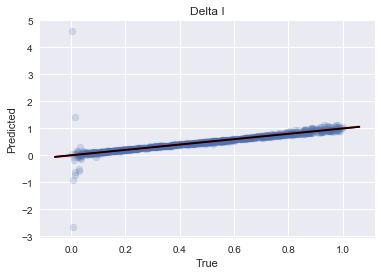

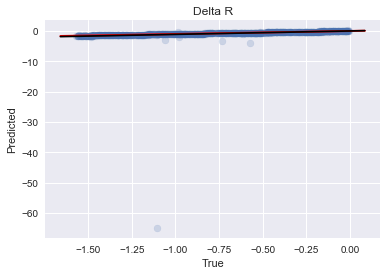

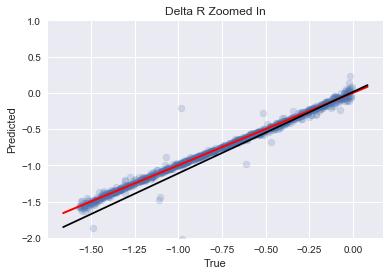

In [3]:
#Initialize and fit OLS model for deltaI 
model_OLS_I = sm.OLS(Y_train['deltaI'], X_train)
model_OLS_R = sm.OLS(Y_train['deltaR'], X_train)

results_OLS_I = model_OLS_I.fit()
results_OLS_R = model_OLS_R.fit()

#Make predictions on testing data
predictions_OLS_I = results_OLS_I.predict(X_test) # make the predictions by the model
predictions_OLS_R = results_OLS_R.predict(X_test)

#print(results_OLS_I.summary())
#print(results_OLS_R.summary())

#If we plot the predictions against the test data, a perfect model should be linear

plotSummary(Y_test['deltaI'], predictions_OLS_I,'Delta I')
#ylim([-1,5])
plotSummary(Y_test['deltaR'], predictions_OLS_R, 'Delta R')
plotSummary(Y_test['deltaR'], predictions_OLS_R, 'Delta R Zoomed In')
ylim([-2,1])

myResiduals(Y_test['deltaI'], predictions_OLS_I)
myResiduals(Y_test['deltaR'], predictions_OLS_R)

### Decision Tree

             Regr 3
E_-350_mV  0.006749
E_-342_mV  0.007342
E_-310_mV  0.114332
E_-260_mV  0.001728
E_-238_mV  0.107093
E_-229_mV  0.006634
E_-206_mV  0.027820
E_-202_mV  0.002289
E_-130_mV  0.006810
E_-54_mV   0.002112
E_-18_mV   0.001075
E_5_mV     0.003133
E_32_mV    0.003111
E_64_mV    0.001792
E_86_mV    0.002181
E_90_mV    0.006245
E_108_mV   0.002245
E_113_mV   0.006725
E_118_mV   0.001320
E_136_mV   0.007334
E_194_mV   0.002554
E_203_mV   0.007336
E_208_mV   0.001332
E_221_mV   0.004528
E_266_mV   0.002453
E_275_mV   0.001684
E_356_mV   0.033620
E_360_mV   0.033126
E_392_mV   0.001665
E_396_mV   0.003697
E_406_mV   0.524452
E_414_mV   0.001870
E_424_mV   0.001071
E_491_mV   0.043068
 
RMSE on test data: 0.021914834222138788 for  deltaI Depth 30
R^2 Score on test data: 0.9938995662747092 for deltaI Depth 30
 
RMSE on test data: 0.024484434829219647 for  deltaR Depth 30
R^2 Score on test data: 0.9969459910595416 for deltaR Depth 30
 
Regression - Decision Tree -  Score:  0.996073

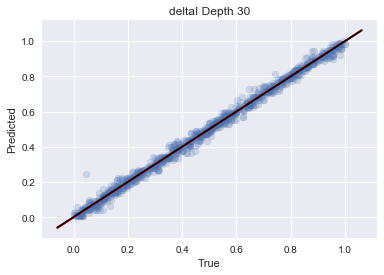

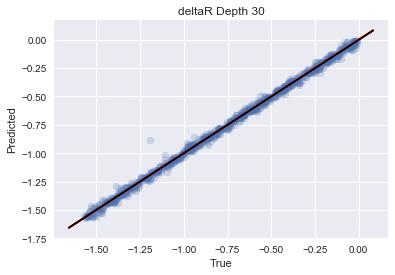

In [4]:
#Initialize the model
regr_DT = DecisionTreeRegressor(max_depth=30, min_samples_leaf = 2)

#Fit the model
regr_DT.fit(X_train, Y_train)


#Print the coefficients or importances

data1 = pd.DataFrame(regr_DT.feature_importances_.T, columns = ['Regr 3']) 

data1.index = X_train.columns

print(data1[data1['Regr 3']>0.001])


#Use model to predict
y_pred_DT = regr_DT.predict(X_test)

#Plot results
plotSummary(Y_test['deltaI'], y_pred_DT[:,0], 'deltaI Depth 30')
#myResiduals(Y_test['deltaI'], y_3[:,0])
plotSummary(Y_test['deltaR'], y_pred_DT[:,1], 'deltaR Depth 30')
#myResiduals(Y_test['deltaR'], y_3[:,1])

print(' ')

#Trying to understand the scoring
print('Regression - Decision Tree -  Score: ', regr_DT.score(X_test,Y_test),', using max depth of 30')
print(' ')
regressor = DecisionTreeRegressor(random_state=0,max_depth=30, min_samples_leaf=5)
print( 'Cross Validation Scores for regressor with max depth of ', regressor.max_depth, ' : ', cross_val_score(regressor, X, Y, cv=10))

## Random Forest


Score - Random Forest: 0.999398761523809 for delta I/R 10
 
RMSE on test data: 0.008643355762462631 for  deltaI 10
R^2 Score on test data: 0.9990510373664255 for deltaI 10
 
RMSE on test data: 0.00952079322225345 for  deltaR 10
R^2 Score on test data: 0.9995382186354771 for deltaR 10


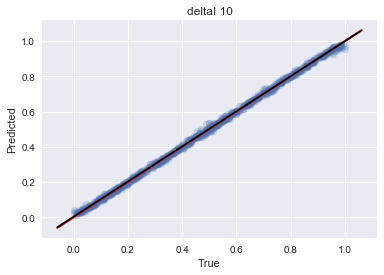

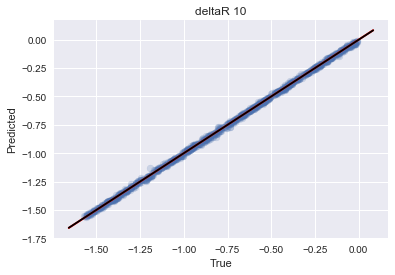

In [46]:
rs = 42
regr_RF = RandomForestRegressor(max_depth = 15, n_estimators = 15, random_state=rs)

regr_RF.fit(X_train, Y_train)

predict_RF = regr_RF.predict(X_test)


importance_RF_10 = pd.Series(regr_RF.feature_importances_, index = X_train.columns)

print('')
print('Score - Random Forest:' , regr_RF.score(X_test, Y_test), 'for delta I/R 10')

plotSummary(Y_test['deltaI'], predict_RF[:,0], 'deltaI 10')
plotSummary(Y_test['deltaR'], predict_RF[:,1], 'deltaR 10')


## AdaBoost Random Forest

 
RMSE on test data: 0.006839431497870553 for  AdaBoost Delta I
R^2 Score on test data: 0.9994058113632155 for AdaBoost Delta I
 
RMSE on test data: 0.005448371558049543 for  AdaBoost Delta R
R^2 Score on test data: 0.9998487750077435 for AdaBoost Delta R
Delta I AdaBoost Score: 0.9994058113632155
Delta R AdaBoost Score: 0.9998487750077435


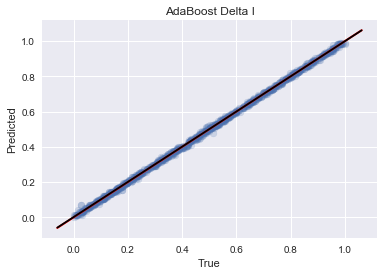

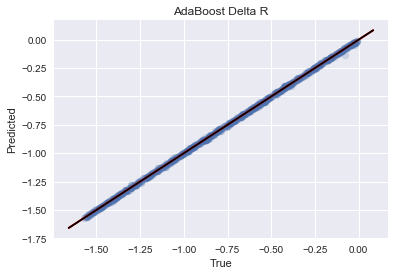

In [6]:
#Using AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

rng = 42
md = 15
nest2 = 15

regr_AB = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md), n_estimators=nest2, random_state=rng)
regr_ABR = AdaBoostRegressor(DecisionTreeRegressor(max_depth = md),n_estimators=nest2, random_state=rng)

model_AB = regr_AB.fit(X_train, Y_train['deltaI'])
model_AB_R = regr_ABR.fit(X_train, Y_train['deltaR'])

y_pred_AB1 = model_AB.predict(X_test)
y_pred_AB1_R = model_AB_R.predict(X_test)

plotSummary(Y_test['deltaI'], y_pred_AB1, 'AdaBoost Delta I')
plotSummary(Y_test['deltaR'], y_pred_AB1_R, 'AdaBoost Delta R')

print('Delta I AdaBoost Score:', model_AB.score(X_test, Y_test['deltaI']))
print('Delta R AdaBoost Score:', model_AB_R.score(X_test, Y_test['deltaR']))



## Gradient Boosting Random Forest

 
RMSE on test data: 0.011299694399757455 for  GradientBoost Delta I
R^2 Score on test data: 0.9983781236904379 for GradientBoost Delta I
 
RMSE on test data: 0.006075340646662853 for  GradientBoost Delta R
R^2 Score on test data: 0.9998119681561871 for GradientBoost Delta R
Delta I Gradient Boost Score: 0.9983781236904378
Delta R Gradient Boost Score: 0.9998119681561871


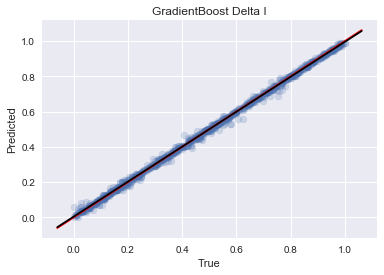

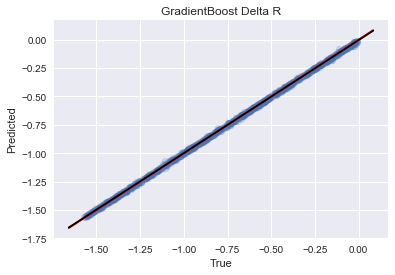

In [7]:
# Using Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

rng = 42

md = 15
nest2 = 50


regr_GB = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)
regr_GBR = GradientBoostingRegressor(max_depth = md, n_estimators=nest2, random_state=rng)

model_GB = regr_GB.fit(X_train, Y_train['deltaI'])
model_GB_R = regr_GBR.fit(X_train, Y_train['deltaR'])

y_pred_GB1 = model_GB.predict(X_test)
y_pred_GB1_R = model_GB_R.predict(X_test)

plotSummary(Y_test['deltaI'], y_pred_GB1, 'GradientBoost Delta I')
plotSummary(Y_test['deltaR'], y_pred_GB1_R, 'GradientBoost Delta R')

print('Delta I Gradient Boost Score:', model_GB.score(X_test, Y_test['deltaI']))
print('Delta R Gradient Boost Score:', model_GB_R.score(X_test, Y_test['deltaR']))

## Testing the Models on the Experimental Data



In [47]:
# Load the experimental data
exp_data = pd.read_csv('HexagonExperimentalData053118_specPoints.csv', header = None, names = energy_names)

pred_phase_OLS_R = results_OLS_R.predict(exp_data)
pred_phase_OLS_I = results_OLS_I.predict(exp_data)

pred_phase_DT = regr_DT.predict(exp_data)

pred_phase_RF = regr_RF.predict(exp_data)

pred_phase_AB_R = model_AB_R.predict(exp_data)
pred_phase_AB_I = model_AB.predict(exp_data)

pred_phase_GB_I = model_GB.predict(exp_data)
pred_phase_GB_R = model_GB_R.predict(exp_data)

predictedPhases = pd.DataFrame(pred_phase_DT, columns = ['deltaI', 'deltaR'], index = ['Decision Tree'])

predictedPhases.loc['OLS'] = (pred_phase_OLS_I[0], pred_phase_OLS_R[0])
predictedPhases.loc['Random Forest'] = pred_phase_RF[0]
predictedPhases.loc['AdaBoost'] = (pred_phase_AB_I[0], pred_phase_AB_R[0])
predictedPhases.loc['Gradient Boosting'] = (pred_phase_GB_I[0], pred_phase_GB_R[0])


predictedPhases

,deltaI,deltaR
Decision Tree,0.081576,-0.022897
OLS,74.623068,133.022285
Random Forest,0.175515,-0.030553
AdaBoost,0.195800,-0.007781
Gradient Boosting,0.128248,-0.005698


## Dimensional Analysis 
This code takes awhile to run because of the for loops

### Decision Tree Dim. Analysis

In [ ]:
#Determining optimal max_depth - should be at the bend 
rmse_test = []
R2_test = []
for i in range(1,60):
    
    regressor_test = DecisionTreeRegressor(max_depth=i, min_samples_leaf=5)
    regressor_test = regressor_test.fit(X_train, Y_train)
    true = Y_test
    predicted = regressor_test.predict(X_test)

    rmse_test.append(np.sqrt(mean_squared_error(true, predicted)))
    R2_test.append(r2_score(true, predicted))
    

index1 = [i for i in range(1,60)]
plt.plot(index1, rmse_test)

figure()
plt.plot(index1, R2_test)

### Random Forest Dim. Analysis

In [ ]:
#Determining optimal max_depth - should be at the bend 
test_range = 20
rmse_test = np.zeros(shape = (test_range-1, test_range-1))
R2_test = np.zeros(shape = (test_range-1, test_range-1))

k = 0
for i in range(1,test_range):
    for j in range(1,test_range):
        
    
        regressor_test = RandomForestRegressor(max_depth=i,n_estimators = j, min_samples_leaf=5)
        regressor_test = regressor_test.fit(X_train, Y_train)
        true = Y_test
        predicted = regressor_test.predict(X_test)
        
        np.put(rmse_test, k, np.sqrt(mean_squared_error(true, predicted)))
        np.put(R2_test, k, r2_score(true, predicted))
        
        k += 1
    

index1 = [i for i in range(1,test_range)]
index2 = [j for j in range(1,test_range)]
plt.plot(index1, rmse_test)

figure()
plt.plot(index1, R2_test)

In [ ]:
figure()
ax = sns.heatmap(rmse_test, vmin = 0, vmax = 0.03)
ax.set(xlabel='Number of Trees', ylabel='Max Depth of Trees');
figure()
ax1 = sns.heatmap(R2_test, vmin= 0.99, vmax = 1.0)
ax1.set(xlabel='Number of Trees', ylabel='Max Depth of Trees');



### AdaBoost Random Forest Dim. Analysis

In [ ]:
#Determining optimal max_depth - should be at the bend 
test_range = 20
rmse_test_AB_I = np.zeros(shape = (test_range-1, test_range-1))
R2_test_AB_I = np.zeros(shape = (test_range-1, test_range-1))

rmse_test_AB_R = np.zeros(shape = (test_range-1, test_range-1))
R2_test_AB_R = np.zeros(shape = (test_range-1, test_range-1))

k = 0
for i in range(1,test_range):
    for j in range(1,test_range):
        
    
        regressor_test_AB_I = AdaBoostRegressor(DecisionTreeRegressor(max_depth=i),n_estimators = j,random_state=rng)
        regressor_test_AB_R = AdaBoostRegressor(DecisionTreeRegressor(max_depth=i),n_estimators = j,random_state=rng)

        regressor_test_AB_I = regressor_test_AB_I.fit(X_train, Y_train['deltaI'])
        regressor_test_AB_R = regressor_test_AB_R.fit(X_train, Y_train['deltaR'])
        
        true_I = Y_test['deltaI']
        true_R = Y_test['deltaR']
        predicted_I = regressor_test_AB_I.predict(X_test)
        predicted_R = regressor_test_AB_R.predict(X_test)
        
        np.put(rmse_test_AB_I, k, np.sqrt(mean_squared_error(true_I, predicted_I)))
        np.put(R2_test_AB_I, k, r2_score(true_I, predicted_I))
        
        np.put(rmse_test_AB_R, k, np.sqrt(mean_squared_error(true_R, predicted_R)))
        np.put(R2_test_AB_R, k, r2_score(true_R, predicted_R))
        
        k += 1
    

index1 = [i for i in range(1,test_range)]
index2 = [j for j in range(1,test_range)]
#plt.plot(index1, rmse_test_AB)

#figure()
#plt.plot(index1, R2_test_AB)



In [ ]:
figure()
ax = sns.heatmap(rmse_test_AB_I, vmin = 0, vmax = 0.03)
ax.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "RMSE for AdaBoost Delta I");

figure()
ax = sns.heatmap(rmse_test_AB_R, vmin = 0, vmax = 0.03)
ax.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "RMSE for AdaBoost Delta R");

figure()
ax1 = sns.heatmap(R2_test_AB_I, vmin= 0.99, vmax = 1.0)
ax1.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "R^2 Score for AdaBoost Delta I");

figure()
ax1 = sns.heatmap(R2_test_AB_R, vmin= 0.99, vmax = 1.0)
ax1.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "R^2 Score for AdaBoost Delta R");

### Gradient Boosting Random Forest

In [ ]:
#Determining optimal max_depth - should be at the bend 
test_range = 40
test_range_1 = 20
rmse_test_GB_I = np.zeros(shape = (test_range-1, test_range-1))
R2_test_GB_I = np.zeros(shape = (test_range-1, test_range-1))

rmse_test_GB_R = np.zeros(shape = (test_range-1, test_range-1))
R2_test_GB_R = np.zeros(shape = (test_range-1, test_range-1))

k = 0
for i in range(1,test_range_1):
    for j in range(15,test_range):
        
    
        regressor_test_GB_I = GradientBoostingRegressor(max_depth=i,n_estimators = j,random_state=rng)
        regressor_test_GB_R = GradientBoostingRegressor(max_depth=i,n_estimators = j,random_state=rng)

        regressor_test_GB_I = regressor_test_GB_I.fit(X_train, Y_train['deltaI'])
        regressor_test_GB_R = regressor_test_GB_R.fit(X_train, Y_train['deltaR'])
        
        true_I = Y_test['deltaI']
        true_R = Y_test['deltaR']
        predicted_GBI = regressor_test_GB_I.predict(X_test)
        predicted_GBR = regressor_test_GB_R.predict(X_test)
        
        np.put(rmse_test_GB_I, k, np.sqrt(mean_squared_error(true_I, predicted_GBI)))
        np.put(R2_test_GB_I, k, r2_score(true_I, predicted_GBI))
        
        np.put(rmse_test_GB_R, k, np.sqrt(mean_squared_error(true_R, predicted_GBR)))
        np.put(R2_test_GB_R, k, r2_score(true_R, predicted_GBR))
        print (i, j)
        
        k += 1
    

index1 = [i for i in range(1,test_range)]
index2 = [j for j in range(1,test_range)]
#plt.plot(index1, rmse_test_AB)

#figure()
#plt.plot(index1, R2_test_AB)

In [ ]:
index2 = [j for j in range(15,test_range)]

figure()
ax = sns.heatmap(rmse_test_GB_I, vmin = 0, vmax = 0.03)
ax.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "RMSE for Gradient Boosting Delta I", xticklabels = index2, yticklabels = index1);

figure()
ax = sns.heatmap(rmse_test_GB_R, vmin = 0, vmax = 0.03)
ax.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "RMSE for Gradient Boosting Delta R", xticklabels = index2, yticklabels = index1);

figure()
ax1 = sns.heatmap(R2_test_GB_I, vmin= 0.99, vmax = 1.0)
ax1.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "R^2 Score for Gradient Boosting Delta I", xticklabels = index2, yticklabels = index1);

figure()
ax1 = sns.heatmap(R2_test_GB_R, vmin= 0.99, vmax = 1.0)
ax1.set(xlabel='Number of Trees', ylabel='Max Depth of Trees', title = "R^2 Score for Gradient Boosting Delta R", xticklabels = index2, yticklabels = index1);